#NAMA : Muhamad Alfarisy
#NIM  : 13216114
#Tugas: PR3 EL4233


#Teori dasar
*Autoassociative memory* memiliki model neuron network dimana target memiliki dimensi dan nilai yang sama dengan data training yang dikehendaki sehingga pemodelan network dapat diamati sebagai berikut : https://prnt.sc/r89vmk

 Dalam melakukan proses belajar untuk mendapatkan weight dari masing-masing neuron, dalam hal ini digunakan dua buah pendekatan yaitu *hebbian rule* dan *pseudoinverse*.

#Hebbian Rule
https://prnt.sc/r89wca

dengan t sebagai variabel target output vector dan variable P sebagai input vector yang masing-masing berdimensi 30x1 sehingga didapatkan ukuran weigth sebesar 30x30.

#Pseudoinverse
https://prnt.sc/r89x6y


#Soal PR3
Dalam memvisualiasikan suatu citra angka 0-9, dibuat dalam suatu 5x6 matriks (column x rows) dengan indeks yang bernilai -1
menunjukkan bahwa bernilai kosong sedangkan untuk yang bernilai 1 bernilai terisi. lakukan pengujian menggunakan hebbian rule (*pattern recognition*) supervised untuk melakukan pengujian citra.


#Library

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

Berikutnya kita perlu medefinisikan angka 0-9 dalam suatu matrix yang berisi 5x6 pixel sebagai berikut:

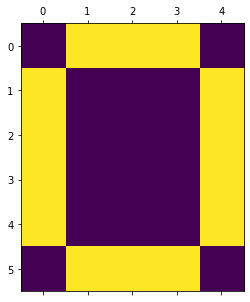

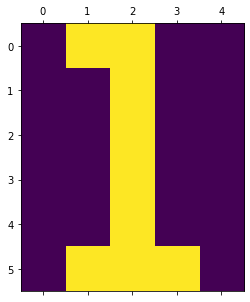

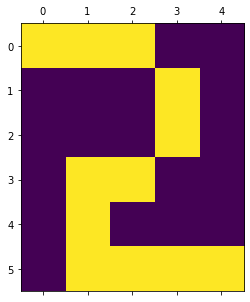

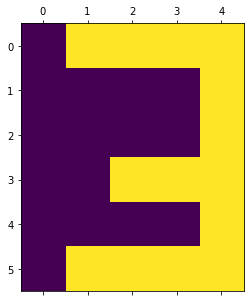

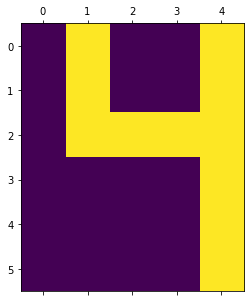

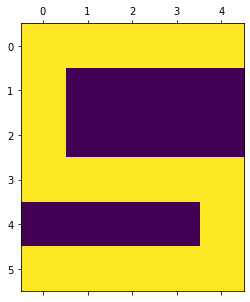

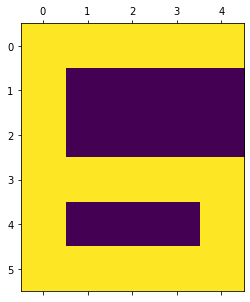

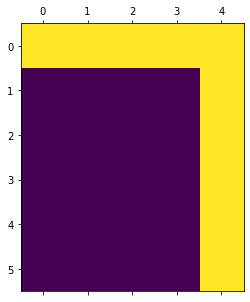

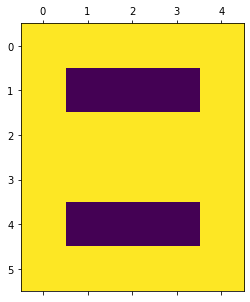

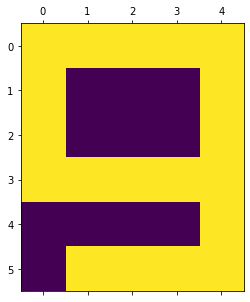

In [145]:
pin0 = np.array([[-1,1,1,1,-1],
                 [1,-1,-1,-1,1], 
                 [1,-1,-1,-1,1], 
                 [1,-1,-1,-1,1], 
                 [1,-1,-1,-1,1], 
                 [-1,1,1,1,-1]])
pin1 = np.array([[-1,1,1,-1,-1], 
                [-1,-1,1,-1,-1], 
                [-1,-1,1,-1,-1], 
                [-1,-1,1,-1,-1], 
                [-1,-1,1,-1,-1], 
                [-1,1,1,1,-1]])
pin2 = np.array([[1,1,1,-1,-1], 
                [-1,-1,-1,1,-1], 
                [-1,-1,-1,1,-1], 
                [-1,1,1,-1,-1], 
                [-1,1,-1,-1,-1], 
                [-1,1,1,1,1]])
pin3 = np.array([[-1,1,1,1,1],
                  [-1,-1,-1,-1,1],
                  [-1,-1,-1,-1,1],
                  [-1,-1,1,1,1],
                  [-1,-1,-1,-1,1],
                  [-1,1,1,1,1]])
pin4 = np.array([[-1,1,-1,-1,1],
                  [-1,1,-1,-1,1],
                  [-1,1,1,1,1],
                  [-1,-1,-1,-1,1],
                  [-1,-1,-1,-1,1],
                  [-1,-1,-1,-1,1]])
pin5 = np.array([[1,1,1,1,1],
                  [1,-1,-1,-1,-1],
                  [1,-1,-1,-1,-1],
                  [1,1,1,1,1],
                  [-1,-1,-1,-1,1],
                  [1,1,1,1,1]])
pin6 = np.array([[1,1,1,1,1],
                [1,-1,-1,-1,-1],
                [1,-1,-1,-1,-1],
                [1,1,1,1,1],
                [1,-1,-1,-1,1],
                [1,1,1,1,1]])
pin7 = np.array([[1,1,1,1,1],
                  [-1,-1,-1,-1,1],
                  [-1,-1,-1,-1,1],
                  [-1,-1,-1,-1,1],
                  [-1,-1,-1,-1,1],
                  [-1,-1,-1,-1,1]])
pin8 = np.array([[1,1,1,1,1],
                  [1,-1,-1,-1,1],
                  [1,1,1,1,1],
                  [1,1,1,1,1],
                  [1,-1,-1,-1,1],
                  [1,1,1,1,1]])
pin9 = np.array([ [1,1,1,1,1],
                  [1,-1,-1,-1,1],
                  [1,-1,-1,-1,1],
                  [1,1,1,1,1],
                  [-1,-1,-1,-1,1],
                  [-1,1,1,1,1]])
#simpan angka tersebut dalam suatu array bernama angka
angka = [pin0, pin1,pin2,pin3,pin4,pin5,pin6,pin7,pin8,pin9]
for i in angka:
    plt.matshow(i)

Jika kita ingin menguji perfomansi untuk data yang lebih sedikit terlebih dahulu katakanlah 4 buah data yang akan dicoba terlebih dahulu terhadap hebbian supervised learning ini. (angka 0,1,2,dan 3)

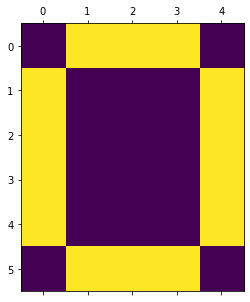

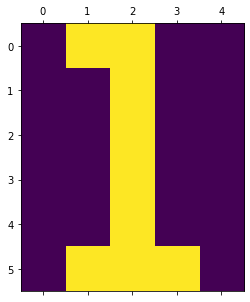

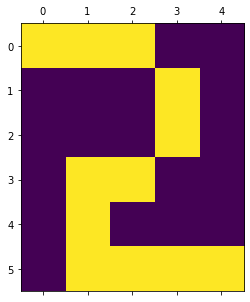

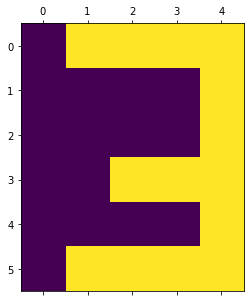

In [146]:
#testing 4 angka awal dulu
angka1 = [pin0, pin1,pin2,pin3]
for i in angka1:
    plt.matshow(i)

pada test pengujian nanti pada *Autoassociative network* dinginkan dengan pengujian menggunakan *noisy pattern*. noise pattern ini akan diambil secara random dari 7 perubahan elemen tiap-tiap angka sebagai berikut:

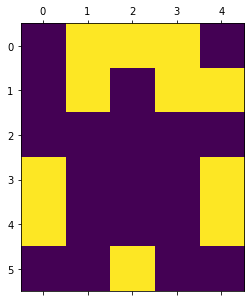

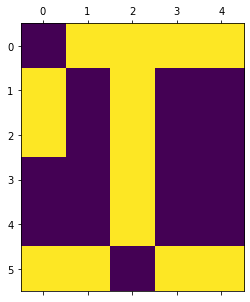

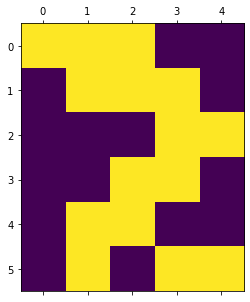

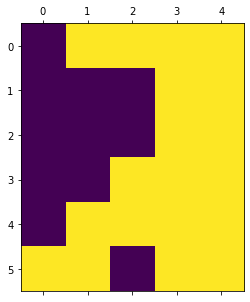

In [142]:
angka_noise = [] #list array untuk noise dari 4 digit angka
for pattern_new in angka1:
    angka_noise.append(pattern_new.copy())
for pattern_new in angka_noise:
    noisy = np.random.choice(30, 7, replace=False) # ambil acak pada 7 pattern each element
    for pix in noisy:
        j = pix % 5
        i = pix // 5
        pattern_new[i, j] *= -1
    plt.matshow(pattern_new)


![alt text](https://)

In [143]:
#Define zero weight at first 30x30
Weight = np.zeros(30*30).reshape(30, 30)
print(Weight)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [0]:
#Membuat Input vector dan Input Vector Noisy dalam suatu list-array
P = [] # input vector
P_noise = [] # input vector noisy pattern
for number in angka1:
    P.append(number.flatten())
for number in angka_noise:
    P_noise.append(number.flatten())

In [152]:
#Menghitung strength weight dari network input 4 digit pertama
for p in P:
    alpha = np.outer(p, p)# vector produk
    Weight += alpha
#plt.matshow(Weight)
print(Weight)


[[ 16.  -8.  -8.  -8.   0.   0.   8.   0.  16.  -8.   0.   8.   0.  16.
   -8.   0.  16.   0.   0.  -8.   0.  16.   0.   8.  -8.   8.  -8.  -8.
   -8.   8.]
 [ -8.  16.  16.   0.  -8.  -8. -16.  -8.  -8.   0.  -8. -16.  -8.  -8.
    0.  -8.  -8.   8.  -8.   0.  -8.  -8.  -8. -16.   0. -16.  16.  16.
   16.   0.]
 [ -8.  16.  16.   0.  -8.  -8. -16.  -8.  -8.   0.  -8. -16.  -8.  -8.
    0.  -8.  -8.   8.  -8.   0.  -8.  -8.  -8. -16.   0. -16.  16.  16.
   16.   0.]
 [ -8.   0.   0.  16.   8.   8.   0.  -8.  -8.  16.   8.   0.  -8.  -8.
   16.   8.  -8.  -8.   8.  16.   8.  -8.  -8.   0.  16.   0.   0.   0.
    0.   0.]
 [  0.  -8.  -8.   8.  16.   0.   8.   0.   0.   8.   0.   8.   0.   0.
    8.   0.   0.   0.  16.   8.   0.   0.   0.   8.   8.   8.  -8.  -8.
   -8.   8.]
 [  0.  -8.  -8.   8.   0.  16.   8.   0.   0.   8.  16.   8.   0.   0.
    8.  16.   0. -16.   0.   8.  16.   0.   0.   8.   8.   8.  -8.  -8.
   -8.  -8.]
 [  8. -16. -16.   0.   8.   8.  16.   8.   8.   0.   8.  

#Testing Network yang sudah dirancang
karna tadi sudah mendapatkan weight dari ke4 data testing maka dilakukan pengujian kembali untuk melihat apakah network yang telah dibangun benar dengan menggunakan persamaan hardlimiter sebagai berikut :

 y= hardlim(Wp)

 dimana hardlim(Wp) = 1 jika x>=0 , dan hardlim(Wp) = -1 untuk x<0. 


In [0]:
#membuat fungsi hardlimiter
def hardlim(W_p):
    for i in range(W_p.size):
        if (W_p[i] >= 0):
            W_p[i] = 1
        else:
            W_p[i] = -1
    print(W_p)
    return np.array(W_p)

[-1.  1.  1.  1. -1.  1. -1. -1. -1.  1.  1. -1. -1. -1.  1.  1. -1. -1.
 -1.  1.  1. -1. -1. -1.  1. -1.  1.  1.  1. -1.]
<class 'numpy.ndarray'> (6, 5)
[-1.  1.  1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1.
 -1. -1. -1. -1.  1. -1. -1. -1.  1.  1.  1. -1.]
<class 'numpy.ndarray'> (6, 5)
[ 1.  1.  1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1. -1.  1.  1.
 -1. -1. -1.  1. -1. -1. -1. -1.  1.  1.  1.  1.]
<class 'numpy.ndarray'> (6, 5)
[-1.  1.  1.  1.  1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1. -1.  1.
  1.  1. -1. -1. -1. -1.  1. -1.  1.  1.  1.  1.]
<class 'numpy.ndarray'> (6, 5)


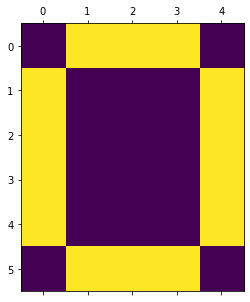

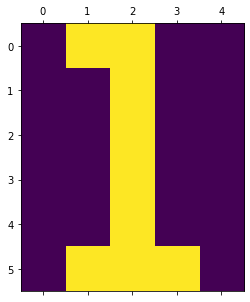

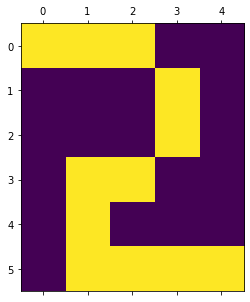

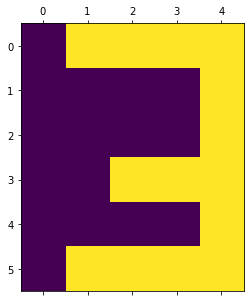

In [154]:
#multiplikasi matriks 
for p in P:
    a = np.matmul(Weight, p)#matriks multiplikasi
    a = hardlim(a)
    a = a.reshape(6, 5) #transformasi menjadi matrix 6x5
    print(type(a), a.shape)
    plt.matshow(a)


Dapat dilihat bahwa data test yang diinput atau kita bilang sebagai variable P masih menyerupai dengan target output vektor t dalam hal ini menunjukkan bahwa *network sudah dilakukan traning* dengan benar.

Berikutnya dicoba untuk kasus input citra yang terdapat *noisy pattern* .

[-1.  1.  1.  1. -1.  1. -1. -1. -1.  1.  1. -1. -1. -1.  1.  1. -1. -1.
 -1.  1.  1. -1. -1. -1.  1. -1.  1.  1.  1. -1.]
<class 'numpy.ndarray'> (6, 5)
[-1.  1.  1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1.
 -1. -1. -1. -1.  1. -1. -1. -1.  1.  1.  1. -1.]
<class 'numpy.ndarray'> (6, 5)
[ 1.  1.  1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1. -1.  1.  1.
 -1. -1. -1.  1. -1. -1. -1. -1.  1.  1.  1.  1.]
<class 'numpy.ndarray'> (6, 5)
[-1.  1.  1.  1.  1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1. -1.  1.
  1.  1. -1. -1. -1. -1.  1. -1.  1.  1.  1.  1.]
<class 'numpy.ndarray'> (6, 5)


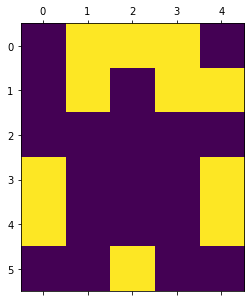

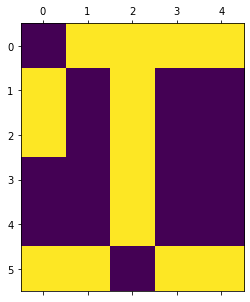

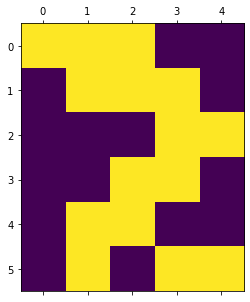

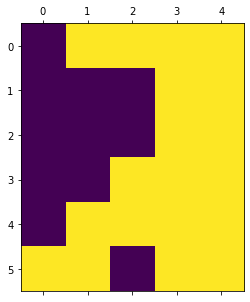

In [160]:
#melakukan testing menggunakan input yang terdapat noisy pattern
for p in P_noise:
    a = np.matmul(Weight, p)
    a = hardlim(a)
    a = a.reshape(6, 5)
    print(type(a), a.shape)
    plt.matshow(p.reshape(6,5))
    #plt.matshow(a)

Bentuk citra yang diberikan input noisy tidak mampu mengikuti citra target output vectornya dalam halam ini.Berikutnya dicoba untuk inputan angka 0-9 :

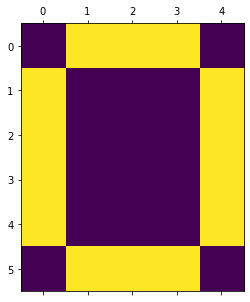

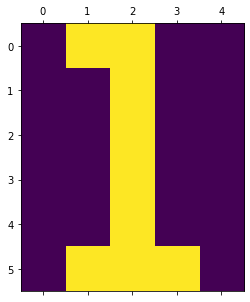

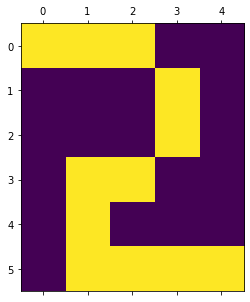

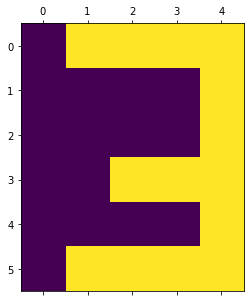

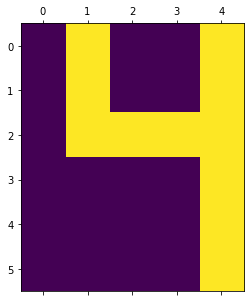

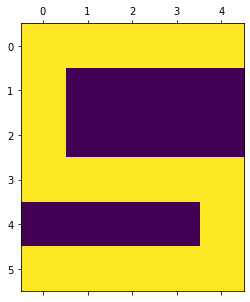

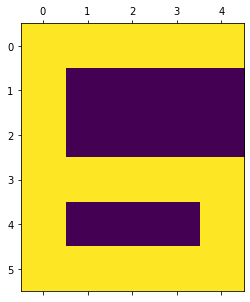

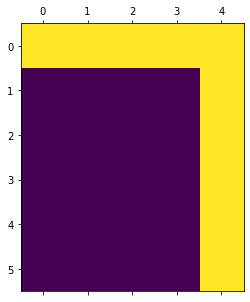

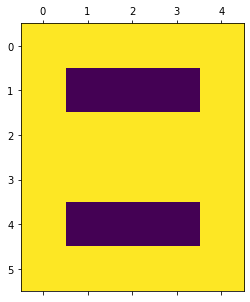

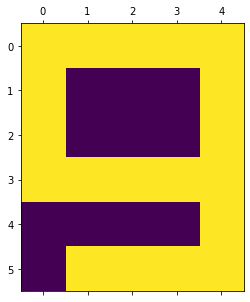

In [161]:
for i in angka:
    plt.matshow(i)

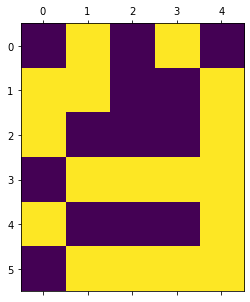

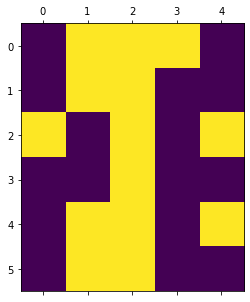

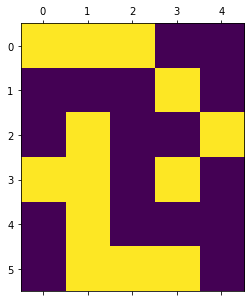

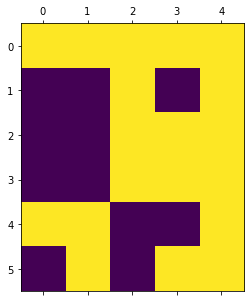

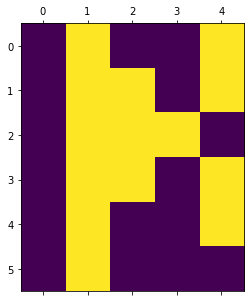

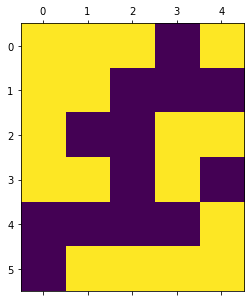

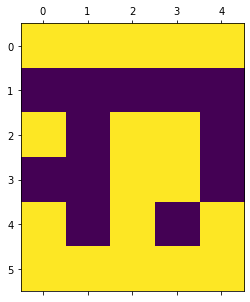

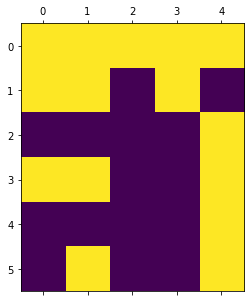

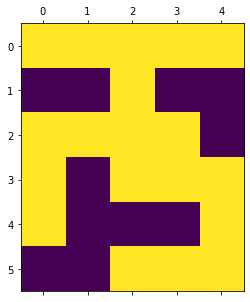

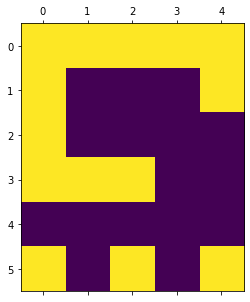

In [163]:
#membuat list array noise yang baru dengan digit input 0-9
angka_noise_new = [] #list array noise baru

for numb in angka:
    angka_noise_new.append(numb.copy())
for numb in angka_noise_new:
    noisy_pattern = np.random.choice(30, 7, replace=False) # ambil acak pada 7 pattern each element
    for pix in noisy_pattern:
        j = pix % 5
        i = pix // 5
        numb[i, j] *= -1
    plt.matshow(numb) #generate img noisy pattern

In [165]:
#Define Weight baru
W = np.zeros(30*30).reshape(30, 30)
W

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0

In [166]:
#Membuat Input vector dan Input Vector Noisy dalam suatu list-array yang baru 0-9 digit
P_new = [] # input vector
P_noise_new = [] # input vector noisy pattern
for number in angka:
    P_new.append(number.flatten())
for number in angka_noise_new:
    P_noise_new.append(number.flatten())
print(len(P_new),len(P_noise_new)) # matriks 10x10

10 10


[[ 40.   8.  16.  16.  16.  16. -16. -16.   0.  -8.  16.  -8. -16.   0.
   -8.  16.  32.  16.  16.   8.   0.   0. -16.  -8.   8.  16.   8.   8.
    8.  24.]
 [  8.  40.  32.  16.  16.   0. -32. -32. -32.   8.   0. -24. -16. -16.
    8.   0.   0.  16.   0.  24. -16. -32. -32. -40.  24. -16.  24.  24.
   24.  24.]
 [ 16.  32.  40.  24.   8.   8. -40. -24. -24.   0.   8. -32. -24. -24.
    0.   8.   8.  24.   8.  16.  -8. -24. -24. -32.  16.  -8.  32.  32.
   32.  16.]
 [ 16.  16.  24.  40.  24.  24. -24. -24. -24.  16.  24. -16. -24. -24.
   16.  24.   8.   8.  24.  32.   8. -24. -24. -16.  32.   8.  16.  16.
   16.  16.]
 [ 16.  16.   8.  24.  40.   8.  -8. -24. -24.  16.   8.   0.  -8.  -8.
   16.   8.   8.   8.  24.  32.  -8. -24. -24. -16.  32.   8.   0.   0.
    0.  32.]
 [ 16.   0.   8.  24.   8.  40.  -8.  -8.  -8.   0.  40.   0.  -8.  -8.
    0.  40.  24.   8.  24.  16.  24.  -8.  -8.   0.  16.  24.  16.  16.
   16.   0.]
 [-16. -32. -40. -24.  -8.  -8.  40.  24.  24.   0.  -8.  

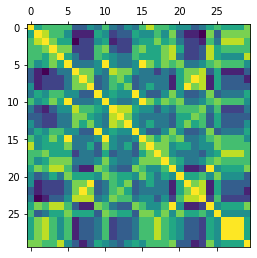

In [170]:
#Menghitung strength weight dari network input 0-9 digit
for i in P_new:
    gamma = np.outer(i, i)# vector produk
    W += gamma
plt.matshow(W)
print(W) #cetak weight

#Latih network untuk digit 0-9 


[-1.  1.  1.  1. -1.  1. -1. -1. -1.  1.  1. -1. -1. -1.  1.  1. -1. -1.
 -1.  1.  1. -1. -1. -1.  1. -1.  1.  1.  1. -1.]
<class 'numpy.ndarray'> (6, 5)
[-1.  1.  1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1.
 -1. -1. -1. -1.  1. -1. -1. -1.  1.  1.  1. -1.]
<class 'numpy.ndarray'> (6, 5)
[ 1.  1.  1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1. -1.  1.  1.
 -1. -1. -1.  1. -1. -1. -1. -1.  1.  1.  1.  1.]
<class 'numpy.ndarray'> (6, 5)
[-1.  1.  1.  1.  1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1. -1.  1.
  1.  1. -1. -1. -1. -1.  1. -1.  1.  1.  1.  1.]
<class 'numpy.ndarray'> (6, 5)
[-1.  1.  1.  1.  1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1. -1.  1.
  1.  1. -1. -1. -1. -1.  1. -1.  1.  1.  1.  1.]
<class 'numpy.ndarray'> (6, 5)
[-1.  1.  1.  1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1. -1.  1.
 -1.  1. -1. -1. -1. -1.  1. -1.  1.  1.  1.  1.]
<class 'numpy.ndarray'> (6, 5)
[-1.  1.  1.  1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1. -1.  1.
 -1

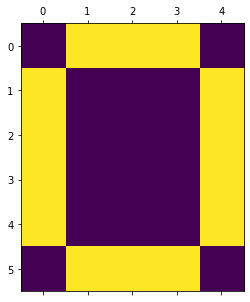

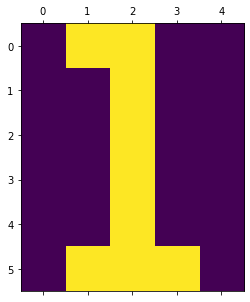

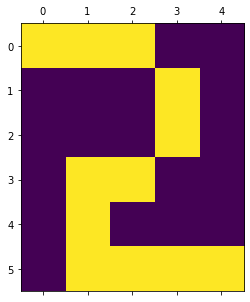

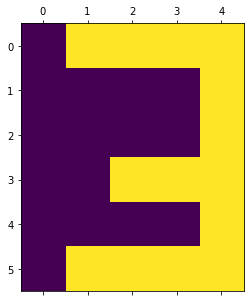

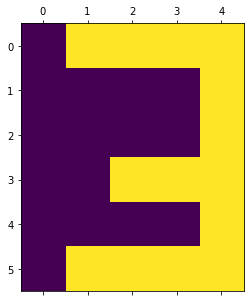

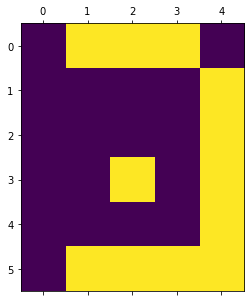

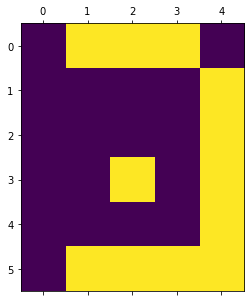

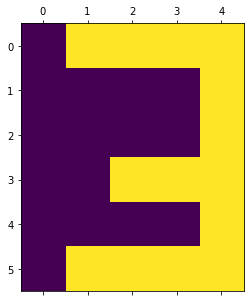

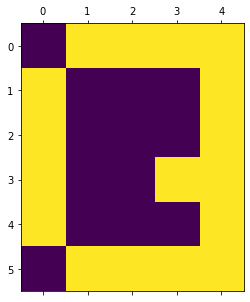

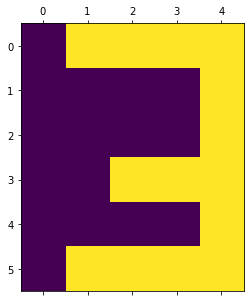

In [171]:
#multiplikasi matriks digit 0-9
for p in P_new:
    b = np.matmul(Weight, p)
    b = hardlim(b)
    b = b.reshape(6, 5) #transformasi menjadi matrix 6x5
    print(type(b), b.shape)
    plt.matshow(b)


 ketika menggunakan variasi data yang lebih sedikit dapat diamati *autoassociation memory* yang dimodelkan memiliki performa yang jauh lebih fleksibel terhadap berbagai macam data testing dimana dengan jenis perlakuan yang sama pada percobaan sebelumnya tetapi dapat mengenali data testing dengan performa yang baik.

Sehingga dapat disimpulkan juga *autoassociation memory* juga memiliki kemampuan yang terbatas dalam menyimpan fitur-fitur targetnya karena semakin banyak variasi target yang dicapai maka performanya akan semakin menurun.


[-1.  1.  1.  1.  1.  1. -1. -1. -1.  1.  1. -1. -1. -1.  1.  1. -1. -1.
  1.  1.  1. -1. -1. -1.  1. -1.  1.  1.  1.  1.]
<class 'numpy.ndarray'> (6, 5)
[-1.  1.  1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1.
 -1. -1. -1. -1.  1. -1. -1. -1.  1.  1.  1. -1.]
<class 'numpy.ndarray'> (6, 5)
[ 1.  1.  1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1. -1.  1.  1.
 -1. -1. -1.  1. -1. -1. -1. -1.  1.  1.  1.  1.]
<class 'numpy.ndarray'> (6, 5)
[-1.  1.  1.  1.  1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1. -1.  1.
  1.  1. -1. -1. -1. -1.  1. -1.  1.  1.  1.  1.]
<class 'numpy.ndarray'> (6, 5)
[ 1.  1.  1. -1.  1. -1. -1.  1.  1. -1. -1. -1.  1.  1. -1. -1.  1.  1.
  1. -1. -1.  1.  1. -1. -1. -1.  1.  1.  1.  1.]
<class 'numpy.ndarray'> (6, 5)
[-1.  1.  1.  1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1. -1.  1.
 -1.  1. -1. -1. -1. -1.  1. -1.  1.  1.  1.  1.]
<class 'numpy.ndarray'> (6, 5)
[-1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.
 -1

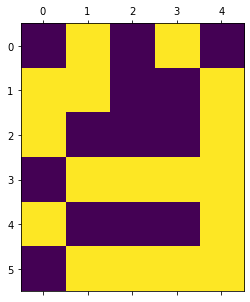

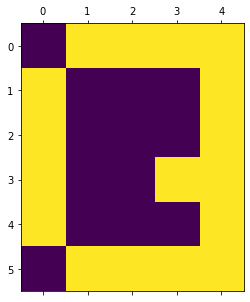

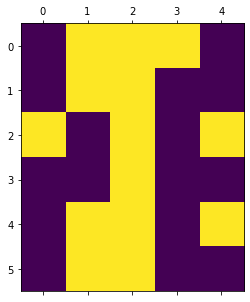

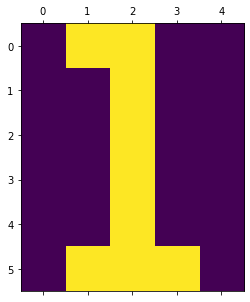

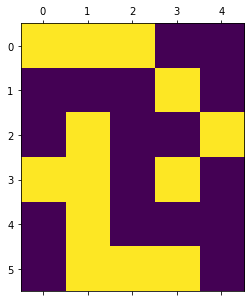

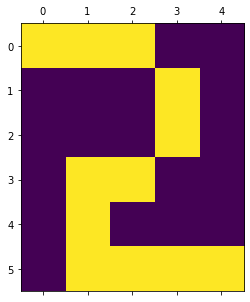

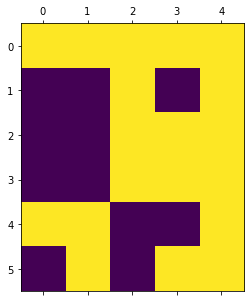

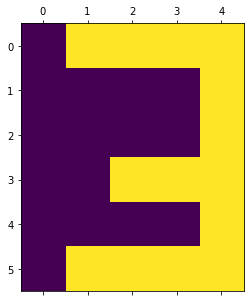

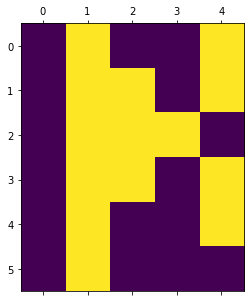

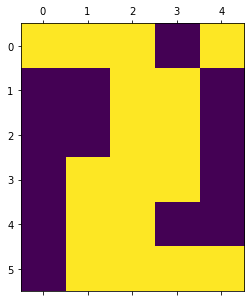

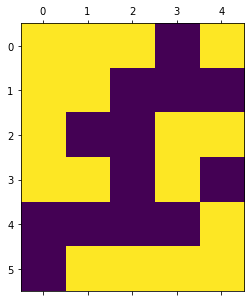

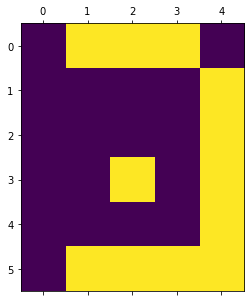

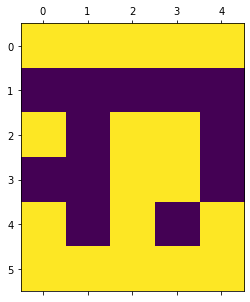

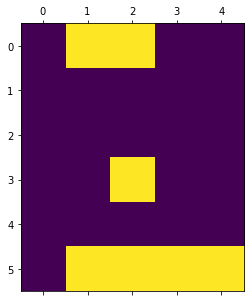

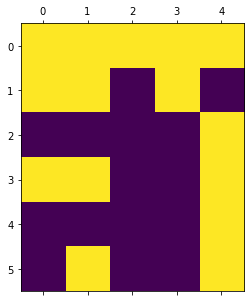

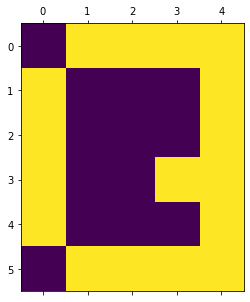

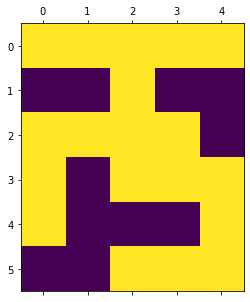

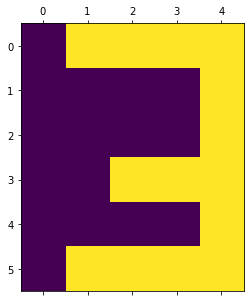

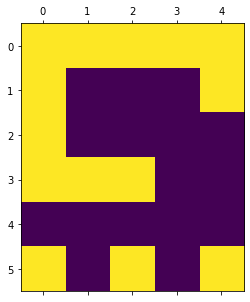

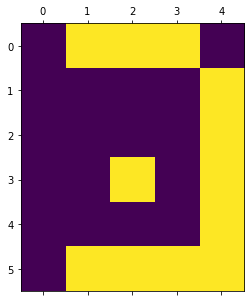

In [172]:
#noise pattern yang baru
for p in P_noise_new:
    a = np.matmul(Weight, p)
    a = hardlim(a)
    a = a.reshape(6, 5)
    print(type(a), a.shape)
    plt.matshow(p.reshape(6,5))
    plt.matshow(a)

Karena data traingin tidak bersifat orhtogonal dan orthonormal maka pada pendekatan hebbian rule baik data testing merupakan data training maupun yang bukan data training (dalam hal ini yang terkena noise) menghasilkan target yang tidak sesuai yang diharapkan (*underfitting*). sehingga mungkin dapat menggunakan pendekatan kedua yakni *pseudoinverse* dalam mengatasi masalah ini.